<a href="https://colab.research.google.com/github/MateoRivera/network-dynamics/blob/main/functions_for_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Handle matrices and vectors
import numpy as np

# Handle Graphs
import networkx as nx

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Algebraic graph theory

In [2]:
def compute_P(W):
    # P = D^-1 @ W
    D = np.diag(W.sum(axis=1))
    return np.linalg.inv(D) @ W

def compute_L(W):
    # L = D - W
    D = np.diag(W.sum(axis=1))
    return D - W

def compute_invariant_distributions_pi(W, target_eigenvalue = 1, use_transition_matrix=True, decimal_precision=3):
    P = compute_P(W) if use_transition_matrix else W
    values, vectors = np.linalg.eig(P.T)
    target_eigenvalue = [i for i, eigenvalue in enumerate(values) if np.isclose(values[i], target_eigenvalue)]

    pi = vectors[:, target_eigenvalue].real
    for i in range(pi.shape[1]):
        pi[:, i] *= np.linalg.norm(pi[:, i])
        pi[:, i] /= np.sum(pi[:, i])

    round_vectorized = np.vectorize(lambda x: round(x, decimal_precision))
    pi = round_vectorized(pi)
    print("⚠️ Note: This result is an approximation due to potential numerical errors ⚠️")
    return pi

def compute_Laplace_invariant_distribution_pi_bar(W, decimal_precision = 3):
    return compute_invariant_distributions_pi(compute_L(W), target_eigenvalue=0, use_transition_matrix=False, decimal_precision=decimal_precision)

## Averaging models with stubborn nodes

In [3]:
def compute_equilibria_with_stubborn(W, stubborn_id, u):
    u = np.array(u)
    if len(u.shape) == 1: # Is not a column vector
        u = u.reshape(-1,1)
    P = compute_P(W)
    regular_id = list(filter(lambda x: x not in stubborn_id, range(len(W))))
    Q = P[np.ix_(regular_id, regular_id)]
    E = P[np.ix_(regular_id, stubborn_id)]
    I = np.eye(len(Q))

    return np.linalg.inv((I-Q)) @ (E @ u)

## Examples of use

In [4]:
W = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 0]
])

compute_invariant_distributions_pi(W)

⚠️ Note: This result is an approximation due to potential numerical errors ⚠️


array([[ 0.333,  0.   ],
       [ 0.333,  0.   ],
       [ 0.333,  0.   ],
       [-0.   ,  0.   ],
       [-0.   , -0.   ],
       [-0.   ,  0.   ],
       [-0.   ,  0.2  ],
       [-0.   ,  0.4  ],
       [-0.   ,  0.4  ]])

In [5]:
compute_Laplace_invariant_distribution_pi_bar(W, 5)

⚠️ Note: This result is an approximation due to potential numerical errors ⚠️


array([[ 0.33333,  0.01351],
       [ 0.33333,  0.01351],
       [ 0.33333,  0.01351],
       [ 0.     , -0.     ],
       [ 0.     ,  0.     ],
       [ 0.     , -0.     ],
       [ 0.     ,  0.23987],
       [ 0.     ,  0.23987],
       [ 0.     ,  0.47973]])

In [6]:
compute_equilibria_with_stubborn(W, [0,8], np.array([[0], [1]]))

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.36363636],
       [0.45454545],
       [1.        ],
       [1.        ]])

In [7]:
compute_equilibria_with_stubborn(W, [0,8], [0,1])

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.36363636],
       [0.45454545],
       [1.        ],
       [1.        ]])

In [8]:
W = np.array([[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
            [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
            [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 1, 1, 0]])
pi_0 = compute_invariant_distributions_pi(W)[:, 0]
pi_0

⚠️ Note: This result is an approximation due to potential numerical errors ⚠️


array([ 0.   , -0.   , -0.   ,  0.214,  0.107,  0.107,  0.143,  0.143,
        0.143,  0.143])

In [9]:
compute_P(W).T @ np.array([0, 0, 0, 1/2, 1/4, 1/4, 0,0,0,0])

array([0.  , 0.  , 0.  , 0.5 , 0.25, 0.25, 0.  , 0.  , 0.  , 0.  ])

In [14]:
compute_invariant_distributions_pi(W)

⚠️ Note: This result is an approximation due to potential numerical errors ⚠️


array([[ 0.   , -0.   ],
       [-0.   , -0.   ],
       [-0.   , -0.   ],
       [ 0.214, -0.973],
       [ 0.107, -0.487],
       [ 0.107, -0.487],
       [ 0.143,  0.737],
       [ 0.143,  0.737],
       [ 0.143,  0.737],
       [ 0.143,  0.737]])

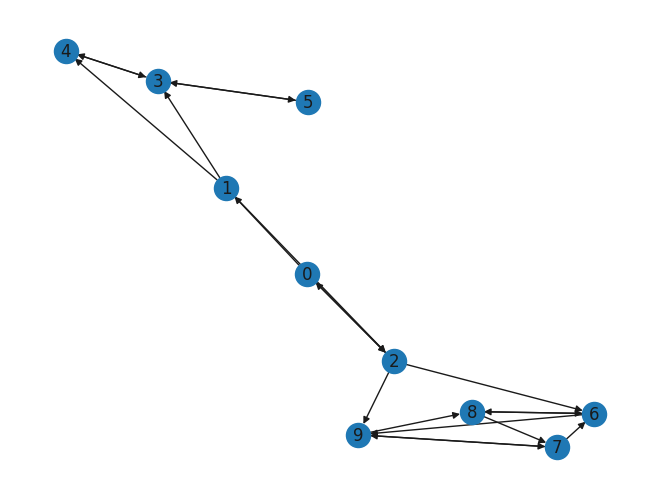

In [10]:
G = nx.from_numpy_array(W, create_using=nx.DiGraph)
nx.draw(G, with_labels=True)

In [11]:
G.edges

OutEdgeView([(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 0), (2, 6), (2, 9), (3, 4), (3, 5), (4, 3), (5, 3), (6, 8), (6, 9), (7, 6), (7, 9), (8, 6), (8, 7), (9, 7), (9, 8)])

In [12]:
for i, j in G.edges:
    print(i+1, "->", j+1)

1 -> 2
1 -> 3
2 -> 3
2 -> 4
2 -> 5
3 -> 1
3 -> 7
3 -> 10
4 -> 5
4 -> 6
5 -> 4
6 -> 4
7 -> 9
7 -> 10
8 -> 7
8 -> 10
9 -> 7
9 -> 8
10 -> 8
10 -> 9
